### Lab5
### Exercise 1 – Data Preprocessing, Regression. Using the given CEREALS dataset, perform data preprocessing and answer the following questions. 
### DATE : 07-10-2022
### Name : Shaarav Dua
### RegNo : 230968256
### Batch : 4

In [33]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [3]:
df = pd.read_csv("Cereals.csv")

In [4]:
df

name mfr type  calories  protein  fat  sodium  fiber  \
0           100NaturalBran   Q    C       120        3    5      15    2.0   
1                 All-Bran   K    C        70        4    1     260    9.0   
2   All-BranwithExtraFiber   K    C        50        4    0     140   14.0   
3            AlmondDelight   R    C       110        2    2     200    1.0   
4    AppleCinnamonCheerios   G    C       110        2    2     180    1.5   
..                     ...  ..  ...       ...      ...  ...     ...    ...   
71                 Triples   G    C       110        2    1     250    0.0   
72                    Trix   G    C       110        1    1     140    0.0   
73               WheatChex   R    C       100        3    1     230    3.0   
74                Wheaties   G    C       100        3    1     200    3.0   
75       WheatiesHoneyGold   G    C       110        2    1     200    1.0   

   carbo sugars potass  vitamins  shelf  weight  cups     rating  
0      8      8    135         0      3     1.0  1.00  33.983679  
1      7      5    320        25      3     1.0  0.33  59.425505  
2      8      0    330        25      3     1.0  0.50  93.704912  
3     14      8      ?        25      3     1.0  0.75  34.384843  
4   10.5     10     70        25      1     1.0  0.75  29.509541  
..   ...    ...    ...       ...    ...     ...   ...        ...  
71    21      3     60        25      3     1.0  0.75  39.106174  
72    13     12     25        25      2     1.0  1.00  27.753301  
73    17      3    115        25      1     1.0  0.67  49.787445  
74    17      3    110        25      1     1.0  1.00  51.592193  
75    16      8     60        25      1     1.0  0.75  36.187559  

[76 rows x 16 columns]

### Q1) Create a table with the 5-number summary of all the numeric attributes

         calories    protein        fat      sodium      fiber    vitamins  \
count   76.000000  76.000000  76.000000   76.000000  76.000000   76.000000   
mean   107.368421   2.526316   1.013158  160.065789   2.048684   28.289474   
std     19.139378   1.089020   1.013159   84.318813   2.219038   22.487813   
min     50.000000   1.000000   0.000000    0.000000   0.000000    0.000000   
25%    100.000000   2.000000   0.000000  132.500000   0.750000   25.000000   
50%    110.000000   2.500000   1.000000  180.000000   1.750000   25.000000   
75%    110.000000   3.000000   2.000000  212.500000   3.000000   25.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  100.000000   

           shelf     weight       cups     rating  
count  76.000000  76.000000  76.000000  76.000000  
mean    2.197368   1.030000   0.827500  42.327057  
std     0.832982   0.151438   0.227204  13.820602  
min     1.000000   0.500000   0.250000  18.042851  
25%     1.000000   1.000000   0.67000

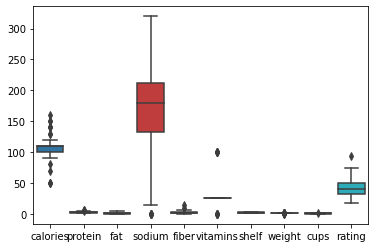

In [5]:
sns.boxplot(data=df)
print(df.describe())

### Q2) For each of the numeric attributes (proteins up to vitamins), identify and replace all missing data (indicated with -1) with the arithmetic mean of the attribute.

In [9]:
df = df.replace(to_replace = '?', value =-1)

In [10]:
df

name mfr type  calories  protein  fat  sodium  fiber  \
0           100NaturalBran   Q    C       120        3    5      15    2.0   
1                 All-Bran   K    C        70        4    1     260    9.0   
2   All-BranwithExtraFiber   K    C        50        4    0     140   14.0   
3            AlmondDelight   R    C       110        2    2     200    1.0   
4    AppleCinnamonCheerios   G    C       110        2    2     180    1.5   
..                     ...  ..  ...       ...      ...  ...     ...    ...   
71                 Triples   G    C       110        2    1     250    0.0   
72                    Trix   G    C       110        1    1     140    0.0   
73               WheatChex   R    C       100        3    1     230    3.0   
74                Wheaties   G    C       100        3    1     200    3.0   
75       WheatiesHoneyGold   G    C       110        2    1     200    1.0   

   carbo sugars potass  vitamins  shelf  weight  cups     rating  
0      8      8    135         0      3     1.0  1.00  33.983679  
1      7      5    320        25      3     1.0  0.33  59.425505  
2      8      0    330        25      3     1.0  0.50  93.704912  
3     14      8     -1        25      3     1.0  0.75  34.384843  
4   10.5     10     70        25      1     1.0  0.75  29.509541  
..   ...    ...    ...       ...    ...     ...   ...        ...  
71    21      3     60        25      3     1.0  0.75  39.106174  
72    13     12     25        25      2     1.0  1.00  27.753301  
73    17      3    115        25      1     1.0  0.67  49.787445  
74    17      3    110        25      1     1.0  1.00  51.592193  
75    16      8     60        25      1     1.0  0.75  36.187559  

[76 rows x 16 columns]

In [11]:
df = df.replace(to_replace = '?', value ='NaN')

In [13]:
df

name mfr type  calories  protein  fat  sodium  fiber  \
0           100NaturalBran   Q    C       120        3    5      15    2.0   
1                 All-Bran   K    C        70        4    1     260    9.0   
2   All-BranwithExtraFiber   K    C        50        4    0     140   14.0   
3            AlmondDelight   R    C       110        2    2     200    1.0   
4    AppleCinnamonCheerios   G    C       110        2    2     180    1.5   
..                     ...  ..  ...       ...      ...  ...     ...    ...   
71                 Triples   G    C       110        2    1     250    0.0   
72                    Trix   G    C       110        1    1     140    0.0   
73               WheatChex   R    C       100        3    1     230    3.0   
74                Wheaties   G    C       100        3    1     200    3.0   
75       WheatiesHoneyGold   G    C       110        2    1     200    1.0   

   carbo sugars potass  vitamins  shelf  weight  cups     rating  
0      8      8    135         0      3     1.0  1.00  33.983679  
1      7      5    320        25      3     1.0  0.33  59.425505  
2      8      0    330        25      3     1.0  0.50  93.704912  
3     14      8     -1        25      3     1.0  0.75  34.384843  
4   10.5     10     70        25      1     1.0  0.75  29.509541  
..   ...    ...    ...       ...    ...     ...   ...        ...  
71    21      3     60        25      3     1.0  0.75  39.106174  
72    13     12     25        25      2     1.0  1.00  27.753301  
73    17      3    115        25      1     1.0  0.67  49.787445  
74    17      3    110        25      1     1.0  1.00  51.592193  
75    16      8     60        25      1     1.0  0.75  36.187559  

[76 rows x 16 columns]

In [14]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo        object
sugars       object
potass       object
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [15]:
df["carbo"] = pd.to_numeric(df["carbo"], errors='coerce')
df["sugars"] = pd.to_numeric(df["sugars"], errors='coerce')
df["potass"] = pd.to_numeric(df["potass"], errors='coerce')

In [16]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [18]:
df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']] = df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].fillna(value=df[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']].mean())

In [19]:
df

name mfr type  calories  protein  fat  sodium  fiber  \
0           100NaturalBran   Q    C       120        3    5      15    2.0   
1                 All-Bran   K    C        70        4    1     260    9.0   
2   All-BranwithExtraFiber   K    C        50        4    0     140   14.0   
3            AlmondDelight   R    C       110        2    2     200    1.0   
4    AppleCinnamonCheerios   G    C       110        2    2     180    1.5   
..                     ...  ..  ...       ...      ...  ...     ...    ...   
71                 Triples   G    C       110        2    1     250    0.0   
72                    Trix   G    C       110        1    1     140    0.0   
73               WheatChex   R    C       100        3    1     230    3.0   
74                Wheaties   G    C       100        3    1     200    3.0   
75       WheatiesHoneyGold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0     8.0       8     135         0      3     1.0  1.00  33.983679  
1     7.0       5     320        25      3     1.0  0.33  59.425505  
2     8.0       0     330        25      3     1.0  0.50  93.704912  
3    14.0       8      -1        25      3     1.0  0.75  34.384843  
4    10.5      10      70        25      1     1.0  0.75  29.509541  
..    ...     ...     ...       ...    ...     ...   ...        ...  
71   21.0       3      60        25      3     1.0  0.75  39.106174  
72   13.0      12      25        25      2     1.0  1.00  27.753301  
73   17.0       3     115        25      1     1.0  0.67  49.787445  
74   17.0       3     110        25      1     1.0  1.00  51.592193  
75   16.0       8      60        25      1     1.0  0.75  36.187559  

[76 rows x 16 columns]

### Q3) Create a table with the 5-number summary of all the numeric attributes after treating missing values. Do you think the strategy used in dealing with missing values was effective? 

In [20]:
df.describe()

calories    protein        fat      sodium      fiber      carbo  \
count   76.000000  76.000000  76.000000   76.000000  76.000000  76.000000   
mean   107.368421   2.526316   1.013158  160.065789   2.048684  14.723684   
std     19.139378   1.089020   1.013159   84.318813   2.219038   4.160444   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  132.500000   0.750000  12.000000   
50%    110.000000   2.500000   1.000000  180.000000   1.750000  14.500000   
75%    110.000000   3.000000   2.000000  212.500000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  76.000000   76.000000   76.000000  76.000000  76.000000  76.000000   
mean    6.934211   93.657895   28.289474   2.197368   1.030000   0.827500   
std     4.473136   68.502565   22.487813   0.832982   0.151438   0.227204   
min    -1.000000   -1.000000    0.000000   1.000000   0.500000   0.250000   
25%     3.000000   40.000000   25.000000   1.000000   1.000000   0.670000   
50%     7.000000   90.000000   25.000000   2.000000   1.000000   0.750000   
75%    11.000000  120.000000   25.000000   3.000000   1.000000   1.000000   
max    15.000000  330.000000  100.000000   3.000000   1.500000   1.500000   

          rating  
count  76.000000  
mean   42.327057  
std    13.820602  
min    18.042851  
25%    32.932466  
50%    40.253086  
75%    50.780847  
max    93.704912

In [21]:
print("Yes, it was effective.")

Yes, it was effective


### Q4) For each of the numeric attributes (proteins up to vitamins), identify and replace all noisy data with the median of attribute.

In [22]:
Q1=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(q=0.25)
Q3=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(q=0.75)
Q1

protein       2.00
fat           0.00
sodium      132.50
fiber         0.75
carbo        12.00
sugars        3.00
potass       40.00
vitamins     25.00
Name: 0.25, dtype: float64

In [23]:
Q3

protein       3.0
fat           2.0
sodium      212.5
fiber         3.0
carbo        17.0
sugars       11.0
potass      120.0
vitamins     25.0
Name: 0.75, dtype: float64

In [24]:
iqr=Q3-Q1
iqrFinal1=Q1-(iqr*1.5)
iqrFinal3=Q3+(iqr*1.5)
median=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].median()
df=df.mask(df>iqrFinal3).fillna(median)
df=df.mask(df<iqrFinal1).fillna(median)
df

C:\Users\Kartabya\AppData\Local\Temp\ipykernel_5436\259746575.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df.mask(df>iqrFinal3).fillna(median)
C:\Users\Kartabya\AppData\Local\Temp\ipykernel_5436\259746575.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df.mask(df<iqrFinal1).fillna(median)


name mfr type  calories  protein  fat  sodium  fiber  \
0           100NaturalBran   Q    C       120      3.0    5    15.0   2.00   
1                 All-Bran   K    C        70      4.0    1   260.0   1.75   
2   All-BranwithExtraFiber   K    C        50      4.0    0   140.0   1.75   
3            AlmondDelight   R    C       110      2.0    2   200.0   1.00   
4    AppleCinnamonCheerios   G    C       110      2.0    2   180.0   1.50   
..                     ...  ..  ...       ...      ...  ...     ...    ...   
71                 Triples   G    C       110      2.0    1   250.0   0.00   
72                    Trix   G    C       110      1.0    1   140.0   0.00   
73               WheatChex   R    C       100      3.0    1   230.0   3.00   
74                Wheaties   G    C       100      3.0    1   200.0   3.00   
75       WheatiesHoneyGold   G    C       110      2.0    1   200.0   1.00   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0     8.0       8   135.0      25.0      3     1.0  1.00  33.983679  
1     7.0       5    90.0      25.0      3     1.0  0.33  59.425505  
2     8.0       0    90.0      25.0      3     1.0  0.50  93.704912  
3    14.0       8    -1.0      25.0      3     1.0  0.75  34.384843  
4    10.5      10    70.0      25.0      1     1.0  0.75  29.509541  
..    ...     ...     ...       ...    ...     ...   ...        ...  
71   21.0       3    60.0      25.0      3     1.0  0.75  39.106174  
72   13.0      12    25.0      25.0      2     1.0  1.00  27.753301  
73   17.0       3   115.0      25.0      1     1.0  0.67  49.787445  
74   17.0       3   110.0      25.0      1     1.0  1.00  51.592193  
75   16.0       8    60.0      25.0      1     1.0  0.75  36.187559  

[76 rows x 16 columns]

### Q5) Create a table with the 5-number summary of all the numeric attributes after treating noisy values. Do you think the strategy used in dealing with noisy values was effective? 

In [25]:
print(df.describe())
print("\nYes, it was effective.")

         calories    protein        fat      sodium      fiber      carbo  \
count   76.000000  76.000000  76.000000   76.000000  76.000000  76.000000   
mean   107.368421   2.401316   1.013158  181.381579   1.792105  14.927632   
std     19.139378   0.875670   1.013159   60.186370   1.520220   3.737828   
min     50.000000   1.000000   0.000000   15.000000   0.000000   7.000000   
25%    100.000000   2.000000   0.000000  147.500000   0.750000  12.000000   
50%    110.000000   2.250000   1.000000  180.000000   1.625000  14.750000   
75%    110.000000   3.000000   2.000000  212.500000   3.000000  17.000000   
max    160.000000   4.000000   5.000000  320.000000   6.000000  23.000000   

          sugars      potass  vitamins      shelf     weight       cups  \
count  76.000000   76.000000      76.0  76.000000  76.000000  76.000000   
mean    6.934211   85.236842      25.0   2.197368   1.030000   0.827500   
std     4.473136   53.146055       0.0   0.832982   0.151438   0.227204   
min   

### Q6) Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [26]:
pd.crosstab(df['mfr'], df['type'] )

type   C  H
mfr        
A      0  1
G     22  0
K     23  0
N      4  1
P      9  0
Q      7  1
R      8  0

### Q7) Which is the cereal with the best rating, worst rating?

In [27]:
print("The Ceral with best rating is :- ",df[df["rating"]==df["rating"].max()]["name"])

print("The Ceral with worst rating is :- ",df[df["rating"]==df["rating"].min()]["name"])

The Ceral with best rating is :-  2    All-BranwithExtraFiber
Name: name, dtype: object
The Ceral with worst rating is :-  9    CapnCrunch
Name: name, dtype: object


### Q8) Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.?

<AxesSubplot:xlabel='type', ylabel='rating'>

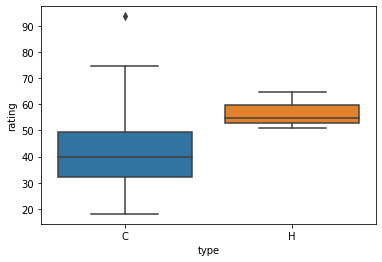

In [28]:
sns.boxplot(data=df,x="type",y='rating')

### Q9) Is there a relation between sugars, calories, carbs, and fat?

In [29]:
df[["sugars","calories","carbo","fat"]].corr()

sugars  calories     carbo       fat
sugars    1.000000  0.571072 -0.487535  0.270861
calories  0.571072  1.000000  0.207908  0.510630
carbo    -0.487535  0.207908  1.000000 -0.313097
fat       0.270861  0.510630 -0.313097  1.000000

### Q10) Which manufacturers produce cereal with highest calories?

In [30]:
df[df["calories"]==df["calories"].max()]["mfr"]

45    K
Name: mfr, dtype: object

### Q11) Use correlation tests and visualization to identify if the two variables calories and consumer rating associated?

In [31]:
df.head()

name mfr type  calories  protein  fat  sodium  fiber  \
0          100NaturalBran   Q    C       120      3.0    5    15.0   2.00   
1                All-Bran   K    C        70      4.0    1   260.0   1.75   
2  All-BranwithExtraFiber   K    C        50      4.0    0   140.0   1.75   
3           AlmondDelight   R    C       110      2.0    2   200.0   1.00   
4   AppleCinnamonCheerios   G    C       110      2.0    2   180.0   1.50   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    8.0       8   135.0      25.0      3     1.0  1.00  33.983679  
1    7.0       5    90.0      25.0      3     1.0  0.33  59.425505  
2    8.0       0    90.0      25.0      3     1.0  0.50  93.704912  
3   14.0       8    -1.0      25.0      3     1.0  0.75  34.384843  
4   10.5      10    70.0      25.0      1     1.0  0.75  29.509541

In [28]:
import scipy.stats as stats
stats.f_oneway(df1.calories,df1.rating)

F_onewayResult(statistic=576.8786819375374, pvalue=2.88283004391097e-53)

Text(0.5, 1.0, 'Bar plot b/w Consumer rating and Calories')

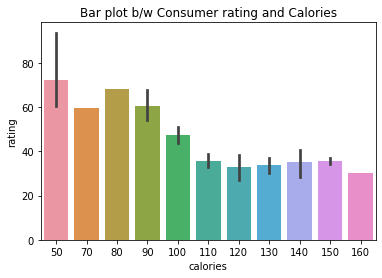

In [32]:
sns.barplot(x="calories",y="rating",data=df1)
pt.title("Bar plot b/w Consumer rating and Calories")

### Q12) Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?

In [34]:
df.head()

name mfr type  calories  protein  fat  sodium  fiber  \
0          100NaturalBran   Q    C       120      3.0    5    15.0   2.00   
1                All-Bran   K    C        70      4.0    1   260.0   1.75   
2  All-BranwithExtraFiber   K    C        50      4.0    0   140.0   1.75   
3           AlmondDelight   R    C       110      2.0    2   200.0   1.00   
4   AppleCinnamonCheerios   G    C       110      2.0    2   180.0   1.50   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    8.0       8   135.0      25.0      3     1.0  1.00  33.983679  
1    7.0       5    90.0      25.0      3     1.0  0.33  59.425505  
2    8.0       0    90.0      25.0      3     1.0  0.50  93.704912  
3   14.0       8    -1.0      25.0      3     1.0  0.75  34.384843  
4   10.5      10    70.0      25.0      1     1.0  0.75  29.509541

In [36]:
dataset_table = pd.crosstab(df['shelf'],df['rating'])
print(dataset_table)

rating  18.042851  19.823573  21.871292  22.396513  22.736446  23.804043  \
shelf                                                                      
1               0          0          0          0          0          0   
2               1          1          1          1          1          1   
3               0          0          0          0          0          0   

rating  26.734515  27.753301  28.025765  28.592785  ...  59.363993  59.425505  \
shelf                                               ...                         
1               0          0          0          0  ...          0          0   
2               1          1          1          0  ...          1          0   
3               0          0          0          1  ...          0          1   

rating  59.642837  60.756112  63.005645  64.533816  68.235885  72.801787  \
shelf                                                                      
1               0          0          0          0          1

<AxesSubplot:xlabel='shelf', ylabel='Count'>

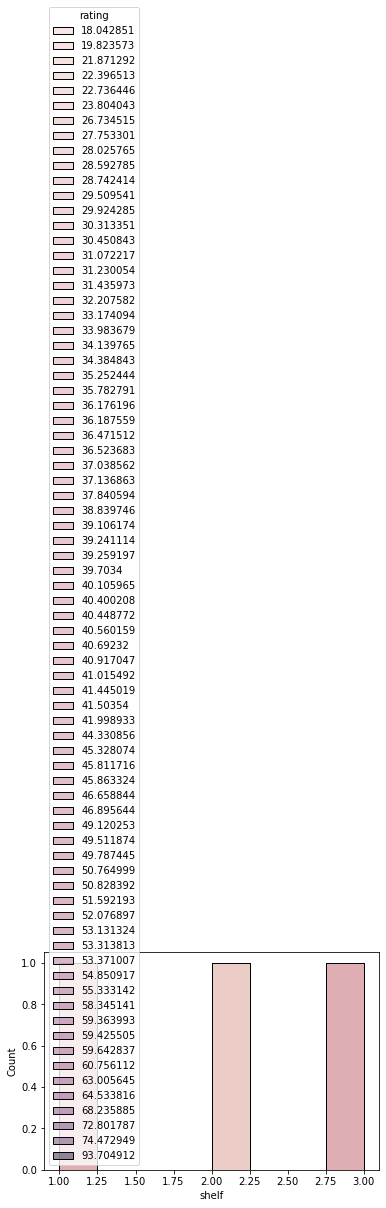

In [45]:
sns.histplot(data=df, x="shelf", hue="rating")

In [46]:
# This are my observed values
dataset_table.values

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [47]:
Observed_values = dataset_table.values
print(Observed_values)

[[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
  0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  1 1 1 0]
 [1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1
  0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0
  1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0
  0 0 0 1]]


In [48]:
val = stats.chi2_contingency(dataset_table)

In [49]:
val

(152.0,
 0.4390333100517003,
 150,
 array([[0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
         0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,

In [50]:
Expected_values = val

In [51]:
no_of_rows = len(dataset_table.iloc[0:,0])
no_of_cols = len(dataset_table.iloc[0,0:])
dof = (no_of_rows - 1) * (no_of_cols - 1)
print("Degree Of Freedom is :- ",dof)
apha = 0.05

Degree Of Freedom is :-  150


In [52]:
from scipy.stats import chi2
chi_square = sum([(o - e)**2/e for o,e in zip(Observed_values,Expected_values)])
chi_square_statistic = chi_square[0]+chi_square[1]

In [53]:
print(" X square Calculated :- ",chi_square_statistic)

 X square Calculated :-  605.4335296207685


In [54]:
critical_value = chi2.ppf(q=1-apha , df = dof)
print("Critical valuye is :- ",critical_value)

Critical valuye is :-  179.58063415418053


In [55]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
print('p-value:',p_value)
print('Significance level: ',apha)
print('Degree of Freedom: ',dof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  150
p-value: 0.0


In [56]:
if chi_square_statistic>=critical_value:
    print("Reject Null Hypothesis (H0) Because there is a relationship between 2 categorical variables")
else:
    print("Accept Null Hypothesis (H0) Because There is no relationship between 2 categorical variables")
    
if p_value<=apha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject Null Hypothesis (H0) Because there is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


### Q13) Is there a relation between manufacturer and rating

In [57]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein     float64
fat           int64
sodium      float64
fiber       float64
carbo       float64
sugars        int64
potass      float64
vitamins    float64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [58]:
df["carbo"] = pd.to_numeric(df["carbo"], errors='coerce')

Text(0.5, 1.0, 'Bar plot of manufacturer and rating')

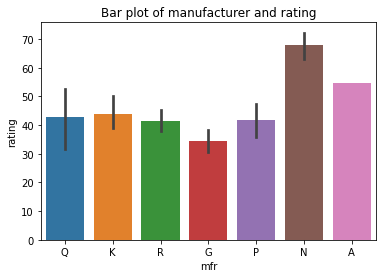

In [61]:
sns.barplot(x="mfr",y="rating",data=df)
pt.title("Bar plot of manufacturer and rating")
## stats.f_oneway(df.mfr,df.rating) #conversion type error

###  Q14) Which nutrients are essential for a good rating for a cereal?

In [42]:
df[["protein","fat","sodium","fiber","carbo","sugars","potass","rating"]].corr()

protein       fat    sodium     fiber     carbo    sugars    potass  \
protein  1.000000  0.226913 -0.120710  0.587843 -0.016469 -0.224640  0.627231   
fat      0.226913  1.000000 -0.248478  0.135546 -0.313097  0.270861  0.323089   
sodium  -0.120710 -0.248478  1.000000 -0.124328  0.444665 -0.281705 -0.091788   
fiber    0.587843  0.135546 -0.124328  1.000000 -0.110855 -0.014489  0.820318   
carbo   -0.016469 -0.313097  0.444665 -0.110855  1.000000 -0.487535 -0.128279   
sugars  -0.224640  0.270861 -0.281705 -0.014489 -0.487535  1.000000  0.089860   
potass   0.627231  0.323089 -0.091788  0.820318 -0.128279  0.089860  1.000000   
rating   0.466606 -0.418439 -0.050622  0.335319  0.159979 -0.772303  0.156768   

           rating  
protein  0.466606  
fat     -0.418439  
sodium  -0.050622  
fiber    0.335319  
carbo    0.159979  
sugars  -0.772303  
potass   0.156768  
rating   1.000000